# 二叉树的迭代遍历

实现二叉树的遍历最直观的就是递归法，但递归的一种实现结构就是栈

每一次递归调用中都会把函数的局部变量、参数值和返回地址等压入调用栈中

返回时从栈顶弹出上一次递归的各项参数  

## 前序遍历
如果用栈实现DFS的前序遍历，出栈的顺序应该为 中，左，右

根据栈”后进先出“的特点，所以入栈的顺序应该是： 右孩子， 左孩子， 父节点

注意：一定要**先判断当前节点非空**，首先判断根节点是否存在，然后在循环中也需要判断左右孩子是否存在，存在才可以入栈  

In [ ]:
# 前序遍历迭代法：栈
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# LC144- 二叉树前序遍历 迭代实现
class Soluion:
    def preorderTraversal(self, root:TreeNode) -> list[int]:
        # 根节点为空，返回空列表
        if root is None:
            return []

        stack = [root]
        result = []
        while stack:
            node = stack.pop()   # 弹出栈顶元素
            # 先处理中节点
            result.append(node.val)
            # 右孩子入栈(先确认右孩子存在)
            if node.right:
                stack.append(node.right)
            # 左孩子入栈
            if node.left:
                stack.append(node.left)
        
        return result

## 中序遍历
**中序遍历的逻辑和前序遍历就不一样了**

因为在前序遍历中，先处理的是中间节点，然后依次处理左节点和右节点  
- 也就是说，前序遍历要访问的元素和要处理的元素顺序是一致的
- 每次访问中间节点就直接可以处理中间节点

但中序遍历，每次访问的是中间节点，但却要先处理左孩子节点  
- **访问和处理的顺序是不一致的**

所以迭代法写中序遍历需要使用 **指针**   
- 指针用来帮助访问每次的中间节点
- 栈用来按遍历顺序处理节点上的孩子节点  

In [ ]:
# LC94- 二叉树的中序遍历 迭代实现
class Soluion:
    def inorderTraversal(self, root:TreeNode) -> list[int]:
        if not root:
            return []

        stack = []   # 一定不能先把root加入栈中了！！！
        result = []
        cur = root    # 指向每次访问中间节点的指针

        while cur or stack:
            # 先迭代找到最底层的左子树，访问其根节点
            if cur:
                stack.append(cur)
                cur = cur.left
            # 到达最左的节点后，处理其栈顶结点
            # 从root遍历左节点依次压栈，到达底层时cur指向最左节点
            # 然后依次按照 左中右 的顺序处理
            else:
                cur = stack.pop()
                result.append(cur.val)
                # 取栈顶右元素节点
                cur = cur.right    # cur有右节点取右节点，无右节点取栈顶变为处理中间节点
        
        return result

## 后序遍历
后序遍历每次访问的节点和要处理的节点也是不一致的

在 前序遍历 的代码基础上，先调整遍历的左右孩子顺序为先右后左，这样出栈的时候就能得到中右左  
最后反转一下得到 后序遍历的代码

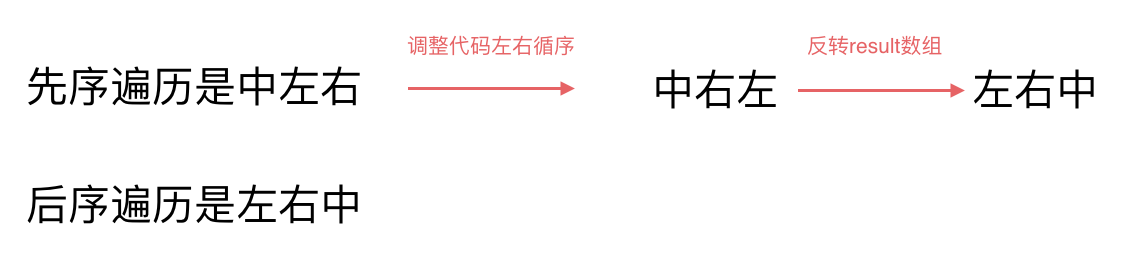

In [ ]:
# LC145- 二叉树后序遍历
class Soluion:
    def postorderTraversal(self, root:TreeNode) -> list[int]:
        if not root:
            return []
        
        stack = [root]
        result = []

        while stack:
            node = stack.pop()
            # 中节点先处理
            result.append(node.val)
            # 左孩子先入栈
            if node.left:
                stack.append(node.left)
            # 右孩子后入栈
            if node.right:
                stack.append(node.right)
        
        return result[::-1]